In [1]:
import os
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard
from keras.layers import advanced_activations


Using TensorFlow backend.


In [2]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()
print('training dataset:', train_images.shape, train_labels.shape, '\ntest_dataset:', test_images.shape, test_labels.shape)

training dataset: (60000, 28, 28) (60000,) 
test_dataset: (10000, 28, 28) (10000,)


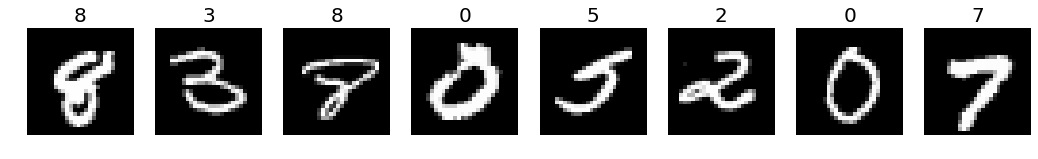

In [28]:
k =8

n_train = train_images.shape[0]

t = np.random.choice(a=np.arange(0,n_train), size=k, replace=False)
plt.figure(1, figsize=(18,18))

for i, item in enumerate(t):
    plt.subplot(300+k*10+1+i)
    plt.imshow(train_images[t[i]], cmap='gray')
    plt.axis('off')
    plt.title(train_labels[t[i]], fontsize=20)

In [54]:
n_test = test_images.shape[0]

t = np.random.choice(a=np.arange(0,n_test), size=k, replace=False)
plt.figure(1, figsize=(18,18))

for i, item in enumerate(t):
    plt.subplot(100+k*10+1+i)
    plt.imshow(test_images[t[i]], cmap='gray')
    plt.axis('off')
    plt.title(test_labels[t[i]], fontsize=20)

(10000, 28, 28)


In [35]:
data_train = np.reshape(train_images, (n_train, 784)).astype(np.float64)/255
data_test = np.reshape(test_images, (n_test, 784)).astype(np.float64)/255
labels_train = tf.keras.utils.to_categorical(train_labels, 10)
labels_test = tf.keras.utils.to_categorical(test_labels, 10)
print('training dataset:', data_train.shape, label_train.shape, '\ntest_dataset:', data_test.shape, label_test.shape)

training dataset: (60000, 784) (60000, 10) 
test_dataset: (10000, 784) (10000, 10)


In [42]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(784, activation = 'relu', input_shape=(784,)))
model.add(tf.keras.layers.Dense(512, activation = 'tanh'))
model.add(tf.keras.layers.Dense(256, activation = 'linear'))
model.add(tf.keras.layers.Dense(128, activation = 'relu'))
model.add(tf.keras.layers.Dense(10, activation = 'softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 784)               615440    
_________________________________________________________________
dense_21 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_22 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_23 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_24 (Dense)             (None, 10)                1290      
Total params: 1,182,874
Trainable params: 1,182,874
Non-trainable params: 0
_________________________________________________________________


In [43]:
fit_model = model.fit(data_train, labels_train, batch_size=512, epochs=5
    , validation_data=(data_test, labels_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 9s 155us/sample - loss: 0.2825 - acc: 0.9142 - val_loss: 0.1138 - val_acc: 0.9644
Epoch 2/5
60000/60000 [==============================] - 8s 127us/sample - loss: 0.0919 - acc: 0.9716 - val_loss: 0.0924 - val_acc: 0.9715
Epoch 3/5
60000/60000 [==============================] - 8s 130us/sample - loss: 0.0559 - acc: 0.9820 - val_loss: 0.0739 - val_acc: 0.9776
Epoch 4/5
60000/60000 [==============================] - 8s 130us/sample - loss: 0.0395 - acc: 0.9878 - val_loss: 0.0710 - val_acc: 0.9779
Epoch 5/5
60000/60000 [==============================] - 7s 125us/sample - loss: 0.0322 - acc: 0.9898 - val_loss: 0.0760 - val_acc: 0.9782


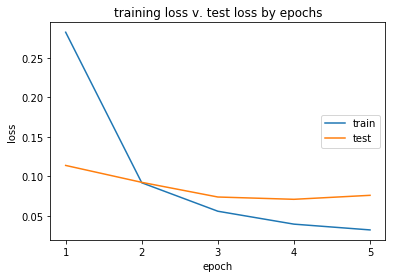

In [44]:
plt.plot(np.arange(1,6), np.asarray(fit_model.history['loss']))
plt.plot(np.arange(1,6), np.asarray(fit_model.history['val_loss']))

plt.title('training loss v. test loss by epochs')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.xticks(np.arange(1,6))
plt.legend(['train','test'], loc='right')
plt.show()

In [45]:
loss, accuracy = model.evaluate(d_train, l_train)
print('train accuracy: .%2f' % (accuracy))

60000/60000 [==============================] - 8s 132us/sample - loss: 0.0214 - acc: 0.9934
train accuracy: .0.993450


In [46]:
loss, accuracy = model.evaluate(d_test, l_test)
print('test accuracy: .%2f' % (accuracy))

10000/10000 [==============================] - 2s 155us/sample - loss: 0.0760 - acc: 0.9782
test accuracy: .0.978200


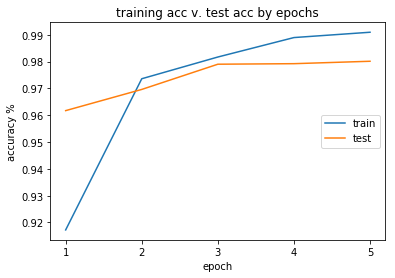

(218, 28, 28)

In [49]:
plt.plot(np.arange(1,6), np.asarray(model_fit.history['acc']))
plt.plot(np.arange(1,6), np.asarray(model_fit.history['val_acc']))

plt.title('training acc v. test acc by epochs')
plt.ylabel('accuracy %')
plt.xlabel('epoch')
plt.xticks(np.arange(1,6))

plt.legend(['train','test'], loc='right')
plt.show()
y = model.predict(d_test)
z = np.argmax(y, axis =1)
x = test_images[test_labels !=z]
y = test_labels[test_labels !=z]
z = z[test_labels !=z]
x.shape

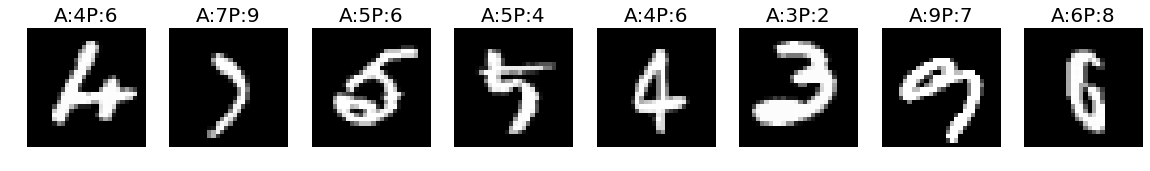

In [48]:
n = x.shape[0]
t = np.random.choice(a=np.arange(0,n), size=k, replace=False)
plt.figure(1, figsize=(20,20))

for i, item in enumerate(t):
    plt.subplot(100+k*10+1+i)
    plt.imshow(x[t[i]], cmap = 'gray')
    plt.axis('off')
    plt.title('A:' + np.array2string(y[t[i]]) + 'P:' + np.array2string(z[t[i]]), fontsize = 20)